## Self-optimizing Map (SOM)

In [1]:
# %pip install minisom
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

In [3]:
# Normalisasi data agar nilainya berada dalam rentang yang seragam
data = data / data.max(axis=0)

In [4]:
# Menentukan ukuran peta, misalkan (10x10) dan inisialisasi SOM
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

In [5]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

In [6]:
# Pelatihan SOM dengan data menggunakan metode train_random
num_epochs = 100
som.train_random(data, num_epochs)

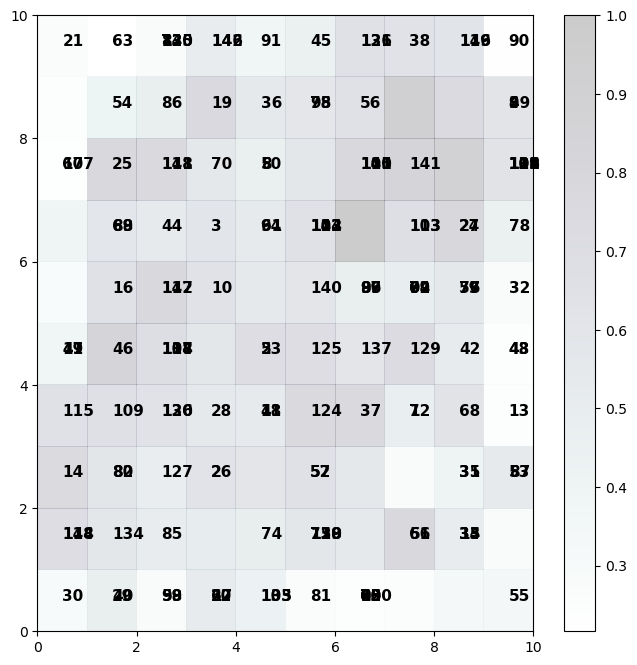

In [7]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()